#Boosting Monocular Depth Estimation Models to High-Resolution via Content-Adaptive Multi-Resolution Merging

This Colab Notebook contains an inference on the implementation from https://github.com/compphoto/BoostingMonocularDepth.

It supports using [MiDas-v2][1] and [LeRes][2] but not [SGRnet][3].


### Instructions
0. Ensure using a GPU by setting "Runtime/change runtime type" to GPU
1. Run code section 1
2. Put your test images inside /content/inputs
3. Run code section 2 :  it will download the needed model weights for both [MiDas-v2][1] and [LeRes][2].

5. Run code section 3
4. Run code section "Ours with MiDas" or "Ours with LeRes" to generate the results
3. Results will be generated in /content/outputs_midas or /content/outputs_leres folders.


[1]: https://github.com/intel-isl/MiDaS/tree/v2
[2]: https://github.com/aim-uofa/AdelaiDepth/tree/main/LeReS
[3]: https://github.com/KexianHust/Structure-Guided-Ranking-Loss

In [1]:
# Code section 1

!mkdir -p inputs
!mkdir -p outputs_midas
!mkdir -p outputs_leres

In [2]:
# COCO dataset 다운로드
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget http://images.cocodataset.org/zips/train2017.zip

--2024-01-03 15:48:08--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.184.195, 3.5.27.104, 3.5.11.188, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.184.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  46.0MB/s    in 5.7s    

2024-01-03 15:48:14 (42.3 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

--2024-01-03 15:48:14--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.172.145, 52.216.179.99, 52.216.43.169, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.172.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip

In [ ]:
import zipfile
import os

# /content/inputs 폴더 생성
input_path = '/content/inputs'
os.makedirs(input_path, exist_ok=True)

# 압축 해제 함수 정의
def unzip_file(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# 각 ZIP 파일을 /content/inputs에 압축 해제
unzip_file('annotations_trainval2017.zip', input_path)
unzip_file('train2017.zip', input_path)

In [ ]:
import os
import shutil

!mkdir -p select_inputs

import os
import shutil

# 파일을 읽기 위한 경로 설정
text_file_path = '/content/drive/MyDrive/otsu_thresholds.txt'
input_folder = '/content/inputs/train2017'
output_folder = '/content/select_inputs'

# 텍스트 파일에서 파일명 읽기
with open(text_file_path, 'r') as file:
    lines = file.readlines()

# 파일명 추출 (확장자 .png 제외)
selected_filenames = [line.split(':')[0].strip().replace('.png', '') for line in lines]

# 이미지 파일만 추출 (.jpg 파일)
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

# 선택된 파일명과 일치하는 파일을 새 폴더로 복사
for image_file in image_files:
    # 파일명에서 확장자 .jpg 제외
    file_name_without_extension = os.path.splitext(image_file)[0]

    if file_name_without_extension in selected_filenames:
        source_path = os.path.join(input_folder, image_file)
        destination_path = os.path.join(output_folder, image_file)
        shutil.copy(source_path, destination_path)

In [3]:
# Code section 2


# Clone git repo
!git clone https://github.com/compphoto/BoostingMonocularDepth.git

!wget https://sfu.ca/~yagiz/CVPR21/latest_net_G.pth
#!gdown https://drive.google.com/u/0/uc?id=1cU2y-kMbt0Sf00Ns4CN2oO9qPJ8BensP&export=download

# Downloading merge model weights
!mkdir -p /content/BoostingMonocularDepth/pix2pix/checkpoints/mergemodel/
!mv latest_net_G.pth /content/BoostingMonocularDepth/pix2pix/checkpoints/mergemodel/

# Downloading Midas weights
!wget https://github.com/AlexeyAB/MiDaS/releases/download/midas_dpt/midas_v21-f6b98070.pt
!mv midas_v21-f6b98070.pt /content/BoostingMonocularDepth/midas/model.pt

# # Downloading LeRes weights
!wget https://cloudstor.aarnet.edu.au/plus/s/lTIJF4vrvHCAI31/download
!mv download /content/BoostingMonocularDepth/res101.pth

Cloning into 'BoostingMonocularDepth'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 318 (delta 9), reused 15 (delta 8), pack-reused 301
Receiving objects: 100% (318/318), 55.51 MiB | 29.04 MiB/s, done.
Resolving deltas: 100% (125/125), done.
--2024-01-03 15:55:05--  https://sfu.ca/~yagiz/CVPR21/latest_net_G.pth
Resolving sfu.ca (sfu.ca)... 142.58.228.150, 142.58.103.17, 142.58.103.137, ...
Connecting to sfu.ca (sfu.ca)|142.58.228.150|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.sfu.ca/~yagiz/CVPR21/latest_net_G.pth [following]
--2024-01-03 15:55:06--  https://www.sfu.ca/~yagiz/CVPR21/latest_net_G.pth
Resolving www.sfu.ca (www.sfu.ca)... 142.58.228.150
Connecting to www.sfu.ca (www.sfu.ca)|142.58.228.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318268048 (304M)
Saving to: ‘latest_net_G.pth’

lat

In [ ]:
# Code section 3
%cd BoostingMonocularDepth/

/content/BoostingMonocularDepth


> After execution of Code section 3 you can run the following code sections multiple times to generate results but **do not run the previous code sections**. If you did so by mistake use "Runtime/ Reset factory runtime" and then start from step 0.

In [ ]:
# Running the method using MiDas
!python run.py --Final --data_dir /content/inputs/train2017 --output_dir  /content/outputs_midas/ --depthNet 0

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
	 processing patch 102 | [  0 139  93  93]
	 processing patch 103 | [  0 174  93  93]
	 processing patch 104 | [  0 209  93  93]
	 processing patch 105 | [  0 244  93  93]
	 processing patch 106 | [  0 278  93  93]
	 processing patch 107 | [35  0 93 93]
	 processing patch 108 | [70  0 93 93]
	 processing patch 109 | [104   0  93  93]
	 processing patch 110 | [139   0  93  93]
	 processing patch 111 | [174   0  93  93]
	 processing patch 112 | [209   0  93  93]
	 processing patch 113 | [244 383  93  93]
	 processing patch 114 | [313 278  93  93]
processing image 216 : 000000001089
	 wholeImage being processed in : 1152
Adjust factor is: 2.054449910554562
Selecting patchs ...
Target resolution:  (4238, 4733, 3)
Dynamicly change merged-in resolution; scale: 0.13520528551203398
	 Resulted depthmap res will be : (573, 640)
patchs to process: 58
	 processing patch 0 | [ 95  17 543 543]
	 processing patch 1 | [ 82  82 491 491]
	 processing patch 2 | [121  8

In [ ]:
import os
import zipfile

# 압축할 폴더 지정
folder_path = '/content/outputs_midas'
zip_file = '/content/outputs_midas.zip'

# ZIP 파일 생성
with zipfile.ZipFile(zip_file, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(folder_path, '..')))

# ZIP 파일 다운로드
from google.colab import files
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Running the method using LeRes
!python run.py --Final --data_dir /content/inputs/train2017 --output_dir  /content/outputs_leres/ --depthNet 2

device: cuda
Namespace(data_dir='/content/inputs', output_dir='/content/outputs_leres/', savepatchs=0, savewholeest=0, output_resolution=1, net_receptive_field_size=None, pix2pixsize=1024, depthNet=2, colorize_results=False, R0=False, R20=False, Final=True, max_res=inf)
----------------- Options ---------------
                    Final: True                          	[default: False]
                       R0: False                         
                      R20: False                         
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./pix2pix/checkpoints         
         colorize_results: False                         
                crop_size: 672                           
                 data_dir: /content/inputs               	[default: None]
                 dataroot: None                          
             dataset_mode: depthmerge                    
                

전역 otsu algorithm

In [ ]:
!mkdir -p /content/output

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지가 저장된 경로
input_folder = '/content/outputs_midas'

# 결과를 저장할 파일
thresholds_file = '/content/otsu_thresholds.txt'

# 해당 폴더에서 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Otsu's threshold 값들을 저장할 리스트
otsu_thresholds = []

for image_file in image_files:
    # 이미지 읽어오기
    img_path = os.path.join(input_folder, image_file)
    img = cv2.imread(img_path)

    # 그레이 스케일로 변환
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러 적용
    blur = cv2.GaussianBlur(imgray, (5, 5), 0)

    # Otsu's thresholding 적용
    ret, imthres = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Otsu's threshold 값 저장
    otsu_thresholds.append(f"{image_file}: {ret}\n")

    # 컨투어 찾기
    contours, hierarchy = cv2.findContours(imthres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # 모든 컨투어 그리기
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

    # 결과 이미지 시각화
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Otsu's Thresholding")
    plt.imshow(imthres, cmap='gray')
    plt.axis('off')

    plt.show()

    # 결과 이미지 저장
    output_path = os.path.join('/content/output/', 'thresholded_' + image_file)
    Image.fromarray(imthres).save(output_path)

# Otsu's threshold 값들을 파일에 저장
with open(thresholds_file, 'w') as file:
    file.writelines(otsu_thresholds)

Output hidden; open in https://colab.research.google.com to view.

otsu threshold 값 통계

In [ ]:
import pandas as pd

# 파일에서 데이터 불러오기
thresholds_data = pd.read_csv('/content/otsu_thresholds.txt', header=None, names=['Image', 'Threshold'], sep=': ')
thresholds = thresholds_data['Threshold']

# 기초 통계 계산
mean_threshold = thresholds.mean()
median_threshold = thresholds.median()
std_threshold = thresholds.std()

print(f"Mean Otsu's Threshold: {mean_threshold}")
print(f"Median Otsu's Threshold: {median_threshold}")
print(f"Standard Deviation: {std_threshold}")

Mean Otsu's Threshold: 110.50830564784053
Median Otsu's Threshold: 110.0
Standard Deviation: 16.79079402886002


<ipython-input-15-c12dae95389e>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  thresholds_data = pd.read_csv('/content/otsu_thresholds.txt', header=None, names=['Image', 'Threshold'], sep=': ')


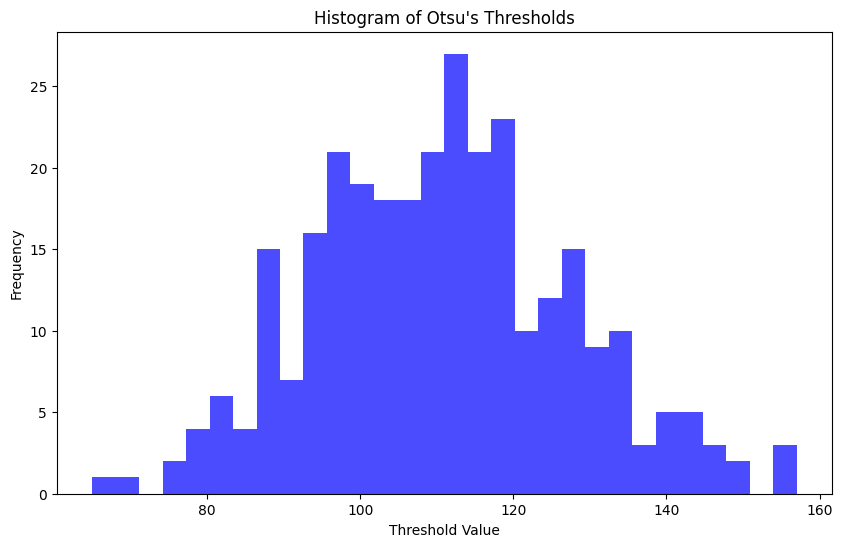

In [ ]:
# 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(thresholds, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Otsu's Thresholds")
plt.xlabel('Threshold Value')
plt.ylabel('Frequency')
plt.show()

적응형 otsu algorithm

In [ ]:
!mkdir -p /content/adaptive_output

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지가 저장된 경로
input_folder = '/content/outputs_midas'

# 결과를 저장할 파일
thresholds_file = '/content/adaptive_thresholds.txt'

# 해당 폴더에서 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# 임계값의 평균을 저장할 리스트
average_thresholds = []

for image_file in image_files:
    # 이미지 읽어오기
    img_path = os.path.join(input_folder, image_file)
    img = cv2.imread(img_path)

    # 그레이 스케일로 변환
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러 적용
    blur = cv2.GaussianBlur(imgray, (5, 5), 0)

    # 적응형 임계값 적용
    adaptive_thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY_INV, 11, 2)

    # 평균 임계값 계산
    average_thresh = np.mean(adaptive_thresh)
    average_thresholds.append(f"{image_file}: {average_thresh}\n")

    # 컨투어 찾기
    contours, hierarchy = cv2.findContours(adaptive_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # 모든 컨투어 그리기
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

    # 결과 이미지 시각화
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Adaptive Thresholding")
    plt.imshow(adaptive_thresh, cmap='gray')
    plt.axis('off')

    plt.show()

    # 결과 이미지 저장
    output_path = os.path.join('/content/adaptive_output/', 'adaptive_thresh_' + image_file)
    Image.fromarray(adaptive_thresh).save(output_path)

# 평균 임계값들을 파일에 저장
with open(thresholds_file, 'w') as file:
    file.writelines(average_thresholds)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 파일에서 데이터 불러오기
data = pd.read_csv('/content/adaptive_thresholds.txt', header=None, sep=': ', names=['Image', 'Average_Threshold'])
thresholds = data['Average_Threshold']

# 기초 통계 계산
mean_threshold = thresholds.mean()
median_threshold = thresholds.median()
std_threshold = thresholds.std()

print(f"Mean Adaptive Threshold: {mean_threshold}")
print(f"Median Adaptive Threshold: {median_threshold}")
print(f"Standard Deviation: {std_threshold}")

Mean Adaptive Threshold: 11.800576016711744
Median Adaptive Threshold: 11.061067708333333
Standard Deviation: 5.934429537935106


<ipython-input-22-08346390e851>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('/content/adaptive_thresholds.txt', header=None, sep=': ', names=['Image', 'Average_Threshold'])


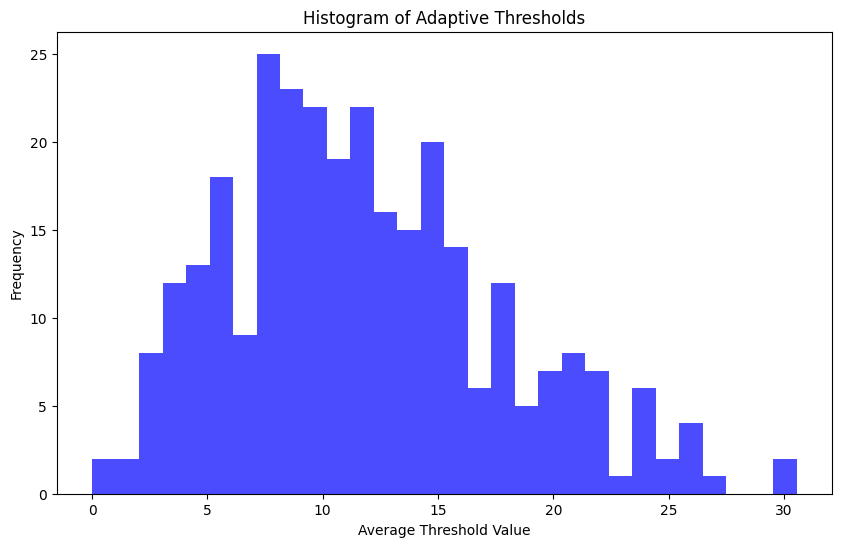

In [ ]:
# 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
plt.hist(thresholds, bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Adaptive Thresholds")
plt.xlabel('Average Threshold Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

zip_file_path = '/content/drive/MyDrive/outputs_depthmap.zip'
unzip_folder_path = '/content/unzipped_output_depthmap'
drive_folder_path = '/content/drive/My Drive/output_depthmap'

if not os.path.exists(unzip_folder_path):
    os.makedirs(unzip_folder_path)

shutil.unpack_archive(zip_file_path, unzip_folder_path)
shutil.move(unzip_folder_path, drive_folder_path)

print("완료")

완료


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

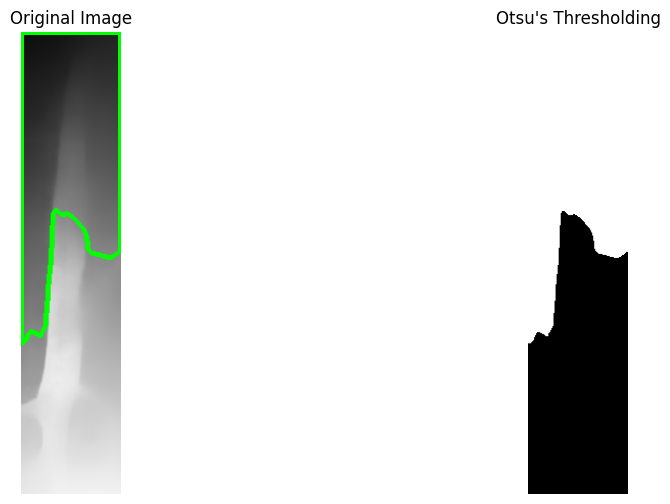

128.0

In [ ]:
# 이미지 파일 경로 (단일 이미지 파일)
img_path = '/content/drive/MyDrive/output_depthmap/tree.png'

# 이미지 읽어오기
img = cv2.imread(img_path)

# 그레이 스케일로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 가우시안 블러 적용
blur = cv2.GaussianBlur(imgray, (3, 3), 0)

equalized_img = cv2.equalizeHist(blur)

# Otsu's thresholding 적용
ret, imthres = cv2.threshold(equalized_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 컨투어 찾기
contours, hierarchy = cv2.findContours(imthres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 모든 컨투어 그리기
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# 결과 이미지 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Otsu's Thresholding")
plt.imshow(imthres, cmap='gray')
plt.axis('off')

plt.show()

# Otsu's threshold 값 출력
otsu_threshold_value = ret
otsu_threshold_value

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 이미지가 저장된 경로
input_folder = '/content/drive/MyDrive/output_depthmap/outputs_midas'

# 해당 폴더에서 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

for image_file in image_files:
    # 이미지 읽어오기
    img_path = os.path.join(input_folder, image_file)
    img = cv2.imread(img_path)

    # 그레이 스케일로 변환
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러 적용
    blur = cv2.GaussianBlur(imgray, (5, 5), 0)

    # 0이 아닌 픽셀 값들만 추출하여 Otsu의 임계값 계산
    non_zero_pixels = blur[blur > 0].reshape(-1, 1).astype(np.uint8)
    otsu_threshold, _ = cv2.threshold(non_zero_pixels, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 계산된 임계값으로 원본 이미지에 이진화 적용
    _, imthres = cv2.threshold(blur, otsu_threshold, 255, cv2.THRESH_BINARY_INV)

    # 컨투어 찾기
    contours, hierarchy = cv2.findContours(imthres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # 모든 컨투어 그리기
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

    # 결과 이미지 시각화
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Otsu's Thresholding")
    plt.imshow(imthres, cmap='gray')
    plt.axis('off')

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!mkdir -p /content/depth_output

In [ ]:
file_path = '/content/drive/MyDrive/otsu_thresholds.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

lines[:5]

['000000001084.png: 130.0\n',
 '000000001006.png: 141.0\n',
 '000000000394.png: 126.0\n',
 '000000000681.png: 86.0\n',
 '000000001390.png: 105.0\n']

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# 이미지가 저장된 경로
input_folder = '/content/drive/MyDrive/output_depthmap/outputs_midas'
output_folder = '/content/depth_output/'

# Otsu's threshold 값들을 파일에서 읽어서 사전으로 저장
thresholds = {}
for line in lines:
    parts = line.split(':')
    if len(parts) == 2:
        image_name = parts[0].strip()
        threshold_value = float(parts[1].strip())
        thresholds[image_name] = threshold_value

# 파일에 저장된 이미지 이름에 대한 처리
for image_name, threshold_value in thresholds.items():
    img_path = os.path.join(input_folder, image_name)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)

        # 그레이 스케일로 변환
        imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # 가우시안 블러 적용
        blur = cv2.GaussianBlur(imgray, (5, 5), 0)

        # 설정된 Otsu's threshold 값 및 범위 적용
        lower_threshold = max(0, threshold_value - 30)
        upper_threshold = min(255, threshold_value + 30)

        # 해당 범위의 threshold로 이진화
        ret, imthres = cv2.threshold(blur, lower_threshold, upper_threshold, cv2.THRESH_BINARY_INV)

        # 컨투어 찾기
        contours, hierarchy = cv2.findContours(imthres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

        # 모든 컨투어 그리기
        cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

        # 결과 이미지 시각화
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Applied Threshold")
        plt.imshow(imthres, cmap='gray')
        plt.axis('off')

        plt.show()

        #결과 이미지 저장
        output_path = os.path.join(output_folder, 'thresholded_' + image_name)
        Image.fromarray(imthres).save(output_path)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import os
import zipfile

# 압축할 폴더 지정
folder_path = '/content/depth_output'
zip_file = '/content/depth_otsu_output.zip'

# ZIP 파일 생성
with zipfile.ZipFile(zip_file, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(folder_path, '..')))

# ZIP 파일 다운로드
from google.colab import files
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import zipfile

# 압축할 폴더 지정
folder_path = '/content/select_inputs'
zip_file = '/content/raw_inputs.zip'

# ZIP 파일 생성
with zipfile.ZipFile(zip_file, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(folder_path, '..')))

# ZIP 파일 다운로드
from google.colab import files
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

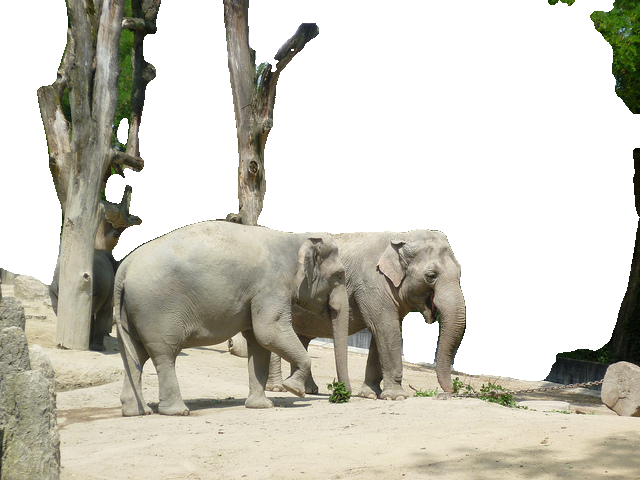

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 흑백 이미지 로드 및 검은색 픽셀 좌표 추출
bw_image = cv2.imread('/content/depth_output/thresholded_000000000934.png', cv2.IMREAD_GRAYSCALE)
mask = (bw_image == 0).astype(np.uint8) * 255    # 검은색 픽셀이면 255, 아니면 0인 마스크

# 컬러 이미지 로드
color_image = cv2.imread('/content/select_inputs/000000000934.jpg')

# 마스크와 컬러 이미지의 크기 조정
mask = cv2.resize(mask, (color_image.shape[1], color_image.shape[0]))
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2BGRA)  # 알파 채널 추가

# 마스크 적용: 마스크가 255인 부분만 컬러 이미지에서 유지
color_image[:, :, 3] = mask

# 결과 이미지 표시
cv2_imshow(color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과 이미지 저장 경로 설정
output_folder = '/content/drive/MyDrive/Depth'
output_image_path = os.path.join(output_folder, 'selected_image.png')

# 결과 이미지 저장
cv2.imwrite(output_image_path, color_image)

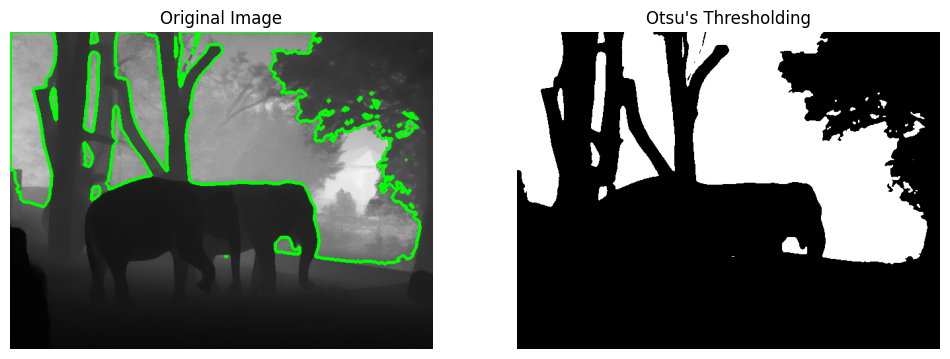

Otsu's threshold for the image: 95.0


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Specify the path of the single image
img_path = '/content/drive/MyDrive/Depth/000000000934_pred.png'

# Otsu's threshold 값을 저장할 변수
otsu_threshold = None

# 이미지 읽어오기
img = cv2.imread(img_path)

# 그레이 스케일로 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 가우시안 블러 적용
blur = cv2.GaussianBlur(imgray, (5, 5), 0)

# Otsu's thresholding 적용
ret, imthres = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's threshold 값 저장
otsu_threshold = ret

# 컨투어 찾기
contours, hierarchy = cv2.findContours(imthres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 모든 컨투어 그리기
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# 결과 이미지 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Otsu's Thresholding")
plt.imshow(imthres, cmap='gray')
plt.axis('off')

plt.show()

# 결과 이미지 저장
output_path = os.path.join('/content/drive/MyDrive/', 'marigold.jpg')
Image.fromarray(imthres).save(output_path)

# Otsu's threshold 값을 출력
print(f"Otsu's threshold for the image: {otsu_threshold}")

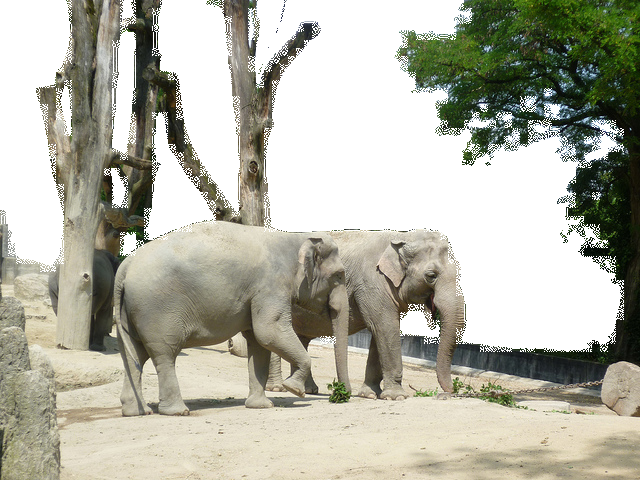

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 흑백 이미지 로드 및 검은색 픽셀 좌표 추출
bw_image = cv2.imread('/content/drive/MyDrive/marigold.jpg', cv2.IMREAD_GRAYSCALE)
mask = (bw_image == 0).astype(np.uint8) * 255    # 검은색 픽셀이면 255, 아니면 0인 마스크

# 컬러 이미지 로드
color_image = cv2.imread('/content/drive/MyDrive/Depth/000000000934.jpg')

# 마스크와 컬러 이미지의 크기 조정
mask = cv2.resize(mask, (color_image.shape[1], color_image.shape[0]))
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2BGRA)  # 알파 채널 추가

# 마스크 적용: 마스크가 255인 부분만 컬러 이미지에서 유지
color_image[:, :, 3] = mask

# 결과 이미지 표시
cv2_imshow(color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과 이미지 저장 경로 설정
output_folder = '/content/drive/MyDrive/Depth'
output_image_path = os.path.join(output_folder, 'marigold_image.png')

# 결과 이미지 저장
cv2.imwrite(output_image_path, color_image)